# Classical ML with Scikit-learn: Iris Species Classification

## Overview
This notebook demonstrates a complete machine learning workflow using the classic Iris dataset. We will:
1. Load and explore the data
2. Preprocess the data (handle missing values, encode labels)
3. Train a Decision Tree classifier
4. Evaluate the model using accuracy, precision, and recall metrics

## Dataset
The Iris dataset contains measurements of iris flowers from three different species:
- Iris-setosa
- Iris-versicolor  
- Iris-virginica

Features include sepal length, sepal width, petal length, and petal width (all in cm).

# 0. Installations of the libraries

Install the required libraries if not installed

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.27.1-cp313-cp313-win_amd64.whl.metadata (4.3 kB)
  Us

## 1. Import Required Libraries

In [4]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Set random state for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [5]:
# Load the Iris dataset
df = pd.read_csv('Dataset/Iris.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Dataset shape: (150, 6)

First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Statistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Statistical Summary:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check unique values in Species column
print(f"\nUnique species: {df['Species'].unique()}")
print(f"Species distribution:")
print(df['Species'].value_counts())

Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total missing values: 0

Unique species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Species distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 3. Data Preprocessing

In [8]:
# Step 1: Handle missing values (though our dataset appears to have none)
print("Handling missing values...")
if df.isnull().sum().sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    # If there were missing values, we could handle them like this:
    # df = df.dropna()  # Remove rows with missing values
    # or df = df.fillna(df.mean())  # Fill with mean values
    print("Missing values handled.")

print(f"\nDataset shape after handling missing values: {df.shape}")

Handling missing values...
✓ No missing values found in the dataset!

Dataset shape after handling missing values: (150, 6)


In [9]:
# Step 2: Prepare features and target variables
print("Preparing features and target variables...")

# Select feature columns (all except Id and Species)
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_columns].copy()

# Target variable (Species)
y = df['Species'].copy()

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"Target classes: {y.unique()}")

Preparing features and target variables...
Features shape: (150, 4)
Target shape: (150,)

Feature columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [11]:
# Step 3: Encode target labels (convert string labels to numeric)
print("Encoding target labels...")

# Create label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Show the mapping
print("Label encoding mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name} -> {i}")

print(f"\nOriginal target (first 10): {y[:10].values}")
print(f"Encoded target (first 10): {y_encoded[:10]}")

# Store the encoded target
y = y_encoded

Encoding target labels...
Label encoding mapping:
  0 -> 0
  1 -> 1
  2 -> 2


AttributeError: 'numpy.ndarray' object has no attribute 'values'

## 4. Split Data and Train Decision Tree Classifier

In [12]:
# Split the data into training and testing sets
print("Splitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class distribution in both sets
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Check class distribution
print("\nClass distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for class_idx, count in zip(unique, counts):
    class_name = label_encoder.classes_[class_idx]
    print(f"  {class_name}: {count} samples")

print("\nClass distribution in testing set:")
unique, counts = np.unique(y_test, return_counts=True)
for class_idx, count in zip(unique, counts):
    class_name = label_encoder.classes_[class_idx]
    print(f"  {class_name}: {count} samples")

Splitting data into training and testing sets...
Training set size: 120 samples
Testing set size: 30 samples
Feature dimensions: 4

Class distribution in training set:
  0: 40 samples
  1: 40 samples
  2: 40 samples

Class distribution in testing set:
  0: 10 samples
  1: 10 samples
  2: 10 samples


In [13]:
# Create and train the Decision Tree classifier
print("Training Decision Tree classifier...")

# Initialize the classifier with specific parameters for better interpretability
dt_classifier = DecisionTreeClassifier(
    random_state=42,        # For reproducible results
    max_depth=5,           # Prevent overfitting
    min_samples_split=5,   # Minimum samples required to split a node
    min_samples_leaf=2,    # Minimum samples required at a leaf node
    criterion='gini'       # Splitting criterion (gini impurity)
)

# Train the classifier
dt_classifier.fit(X_train, y_train)

print("✓ Decision Tree classifier trained successfully!")
print(f"\nModel parameters:")
print(f"  Max depth: {dt_classifier.max_depth}")
print(f"  Criterion: {dt_classifier.criterion}")
print(f"  Number of features: {dt_classifier.n_features_in_}")
print(f"  Number of classes: {dt_classifier.n_classes_}")
print(f"  Feature names: {dt_classifier.feature_names_in_}")

Training Decision Tree classifier...
✓ Decision Tree classifier trained successfully!

Model parameters:
  Max depth: 5
  Criterion: gini
  Number of features: 4
  Number of classes: 3
  Feature names: ['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm']


## 5. Model Evaluation

In [14]:
# Make predictions on both training and testing sets
print("Making predictions...")

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

print("✓ Predictions completed!")

# Display first few predictions vs actual values
print(f"\nFirst 10 predictions vs actual (Test Set):")
print("Predicted | Actual | Species Name")
print("-" * 35)
for i in range(min(10, len(y_test))):
    pred_name = label_encoder.classes_[y_test_pred[i]]
    actual_name = label_encoder.classes_[y_test[i]]
    print(f"{y_test_pred[i]:>9} | {y_test[i]:>6} | {pred_name} -> {actual_name}")

Making predictions...
✓ Predictions completed!

First 10 predictions vs actual (Test Set):
Predicted | Actual | Species Name
-----------------------------------
        0 |      0 | 0 -> 0
        2 |      2 | 2 -> 2
        1 |      1 | 1 -> 1
        1 |      1 | 1 -> 1
        0 |      0 | 0 -> 0
        1 |      1 | 1 -> 1
        0 |      0 | 0 -> 0
        0 |      0 | 0 -> 0
        2 |      2 | 2 -> 2
        1 |      1 | 1 -> 1


In [15]:
# Calculate accuracy, precision, and recall
print("Calculating performance metrics...")

# Training set metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Testing set metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print("=" * 60)
print("PERFORMANCE METRICS SUMMARY")
print("=" * 60)

print(f"\nTRAINING SET PERFORMANCE:")
print(f"  Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Precision: {train_precision:.4f} ({train_precision*100:.2f}%)")
print(f"  Recall:    {train_recall:.4f} ({train_recall*100:.2f}%)")

print(f"\nTESTING SET PERFORMANCE:")
print(f"  Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"  Recall:    {test_recall:.4f} ({test_recall*100:.2f}%)")

# Calculate per-class metrics
print(f"\nPER-CLASS METRICS (Testing Set):")
test_precision_per_class = precision_score(y_test, y_test_pred, average=None)
test_recall_per_class = recall_score(y_test, y_test_pred, average=None)

for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name}:")
    print(f"    Precision: {test_precision_per_class[i]:.4f}")
    print(f"    Recall:    {test_recall_per_class[i]:.4f}")

Calculating performance metrics...
PERFORMANCE METRICS SUMMARY

TRAINING SET PERFORMANCE:
  Accuracy:  0.9833 (98.33%)
  Precision: 0.9841 (98.41%)
  Recall:    0.9833 (98.33%)

TESTING SET PERFORMANCE:
  Accuracy:  0.9667 (96.67%)
  Precision: 0.9697 (96.97%)
  Recall:    0.9667 (96.67%)

PER-CLASS METRICS (Testing Set):
  0:
    Precision: 1.0000
    Recall:    1.0000
  1:
    Precision: 1.0000
    Recall:    0.9000
  2:
    Precision: 0.9091
    Recall:    1.0000


In [16]:
# Detailed classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT")  
print("=" * 60)
print("\nTesting Set Classification Report:")
target_names = label_encoder.classes_
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print("(Rows: Actual, Columns: Predicted)")
print(f"{'':>15}", end="")
for class_name in label_encoder.classes_:
    print(f"{class_name:>15}", end="")
print()

for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name:>15}", end="")
    for j in range(len(label_encoder.classes_)):
        print(f"{cm[i][j]:>15}", end="")
    print()


DETAILED CLASSIFICATION REPORT

Testing Set Classification Report:


TypeError: object of type 'numpy.int64' has no len()

## 6. Visualizations and Model Analysis

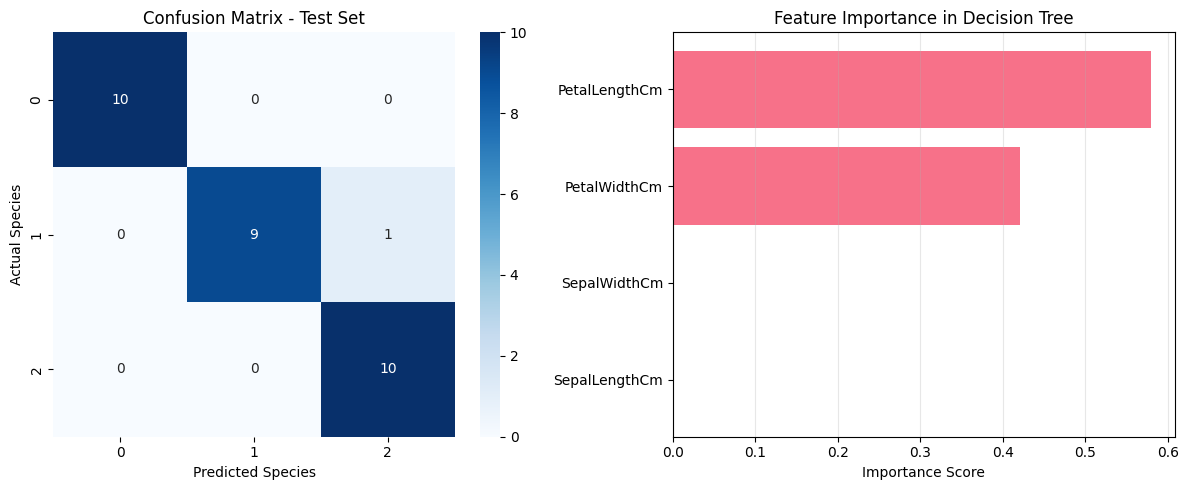

FEATURE IMPORTANCE ANALYSIS:
       SepalLengthCm: 0.0000 (0.00%)
        SepalWidthCm: 0.0000 (0.00%)
       PetalLengthCm: 0.5791 (57.91%)
        PetalWidthCm: 0.4209 (42.09%)


In [17]:
# Create confusion matrix heatmap
plt.figure(figsize=(12, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')

# Feature Importance
plt.subplot(1, 2, 2)
feature_importance = dt_classifier.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance details
print("FEATURE IMPORTANCE ANALYSIS:")
print("=" * 40)
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature:>20}: {importance:.4f} ({importance*100:.2f}%)")

C:\Users\KOBILO\AppData\Local\Temp\ipykernel_12128\3815995290.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(feature_data.values, labels=['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth'])


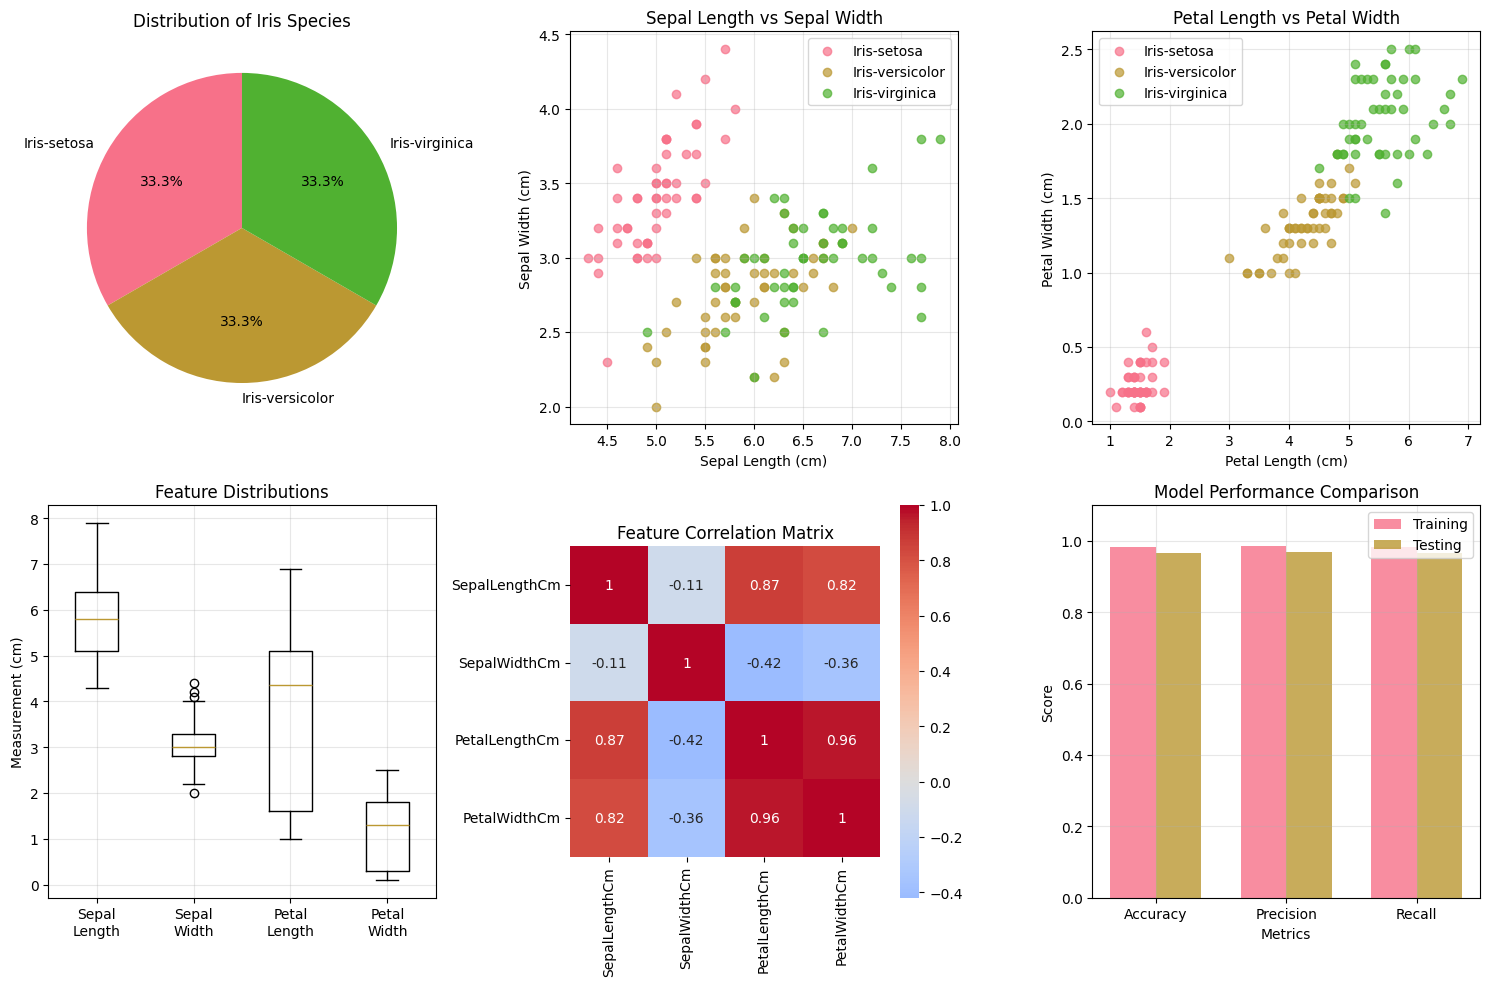

In [18]:
# Visualize the dataset distribution
plt.figure(figsize=(15, 10))

# 1. Species distribution
plt.subplot(2, 3, 1)
species_counts = df['Species'].value_counts()
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Iris Species')

# 2. Sepal Length vs Sepal Width
plt.subplot(2, 3, 2)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['SepalLengthCm'], species_data['SepalWidthCm'], 
                label=species, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Petal Length vs Petal Width
plt.subplot(2, 3, 3)
for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['PetalLengthCm'], species_data['PetalWidthCm'], 
                label=species, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Box plot of features
plt.subplot(2, 3, 4)
feature_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
plt.boxplot(feature_data.values, labels=['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth'])
plt.title('Feature Distributions')
plt.ylabel('Measurement (cm)')
plt.grid(True, alpha=0.3)

# 5. Correlation heatmap
plt.subplot(2, 3, 5)
correlation_matrix = feature_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')

# 6. Model performance comparison
plt.subplot(2, 3, 6)
metrics = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Testing', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "numpy.int64") to str

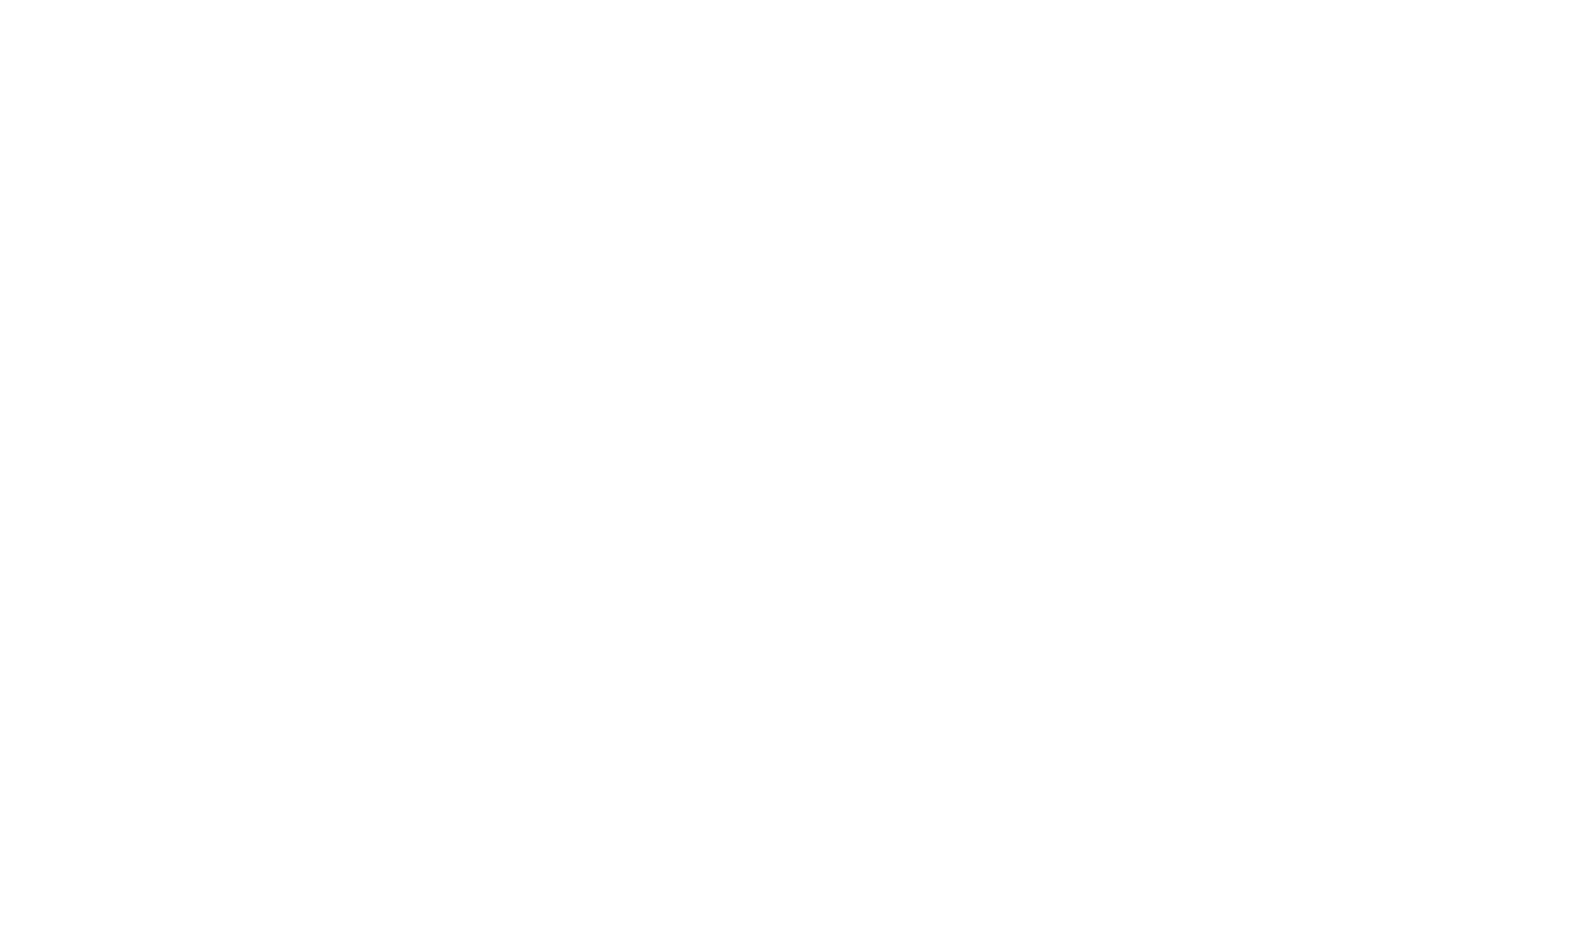

In [19]:
# Visualize the Decision Tree (simplified version)
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_classifier, 
               feature_names=feature_names,
               class_names=label_encoder.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title('Decision Tree Visualization', fontsize=16, pad=20)
plt.show()

print("Decision Tree Structure:")
print(f"  Tree depth: {dt_classifier.get_depth()}")
print(f"  Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"  Total nodes: {dt_classifier.tree_.node_count}")

## 7. Model Insights and Conclusions

In [20]:
# Final Summary and Analysis
print("🌸 IRIS SPECIES CLASSIFICATION - FINAL ANALYSIS 🌸")
print("=" * 60)

print(f"\n📊 DATASET SUMMARY:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: {len(feature_columns)}")
print(f"   • Classes: {len(label_encoder.classes_)}")
print(f"   • Missing values: {df.isnull().sum().sum()}")

print(f"\n🤖 MODEL CONFIGURATION:")
print(f"   • Algorithm: Decision Tree Classifier")
print(f"   • Max depth: {dt_classifier.max_depth}")
print(f"   • Splitting criterion: {dt_classifier.criterion}")
print(f"   • Training samples: {len(X_train)}")
print(f"   • Testing samples: {len(X_test)}")

print(f"\n📈 PERFORMANCE RESULTS:")
print(f"   • Test Accuracy:  {test_accuracy:.1%}")
print(f"   • Test Precision: {test_precision:.1%}")
print(f"   • Test Recall:    {test_recall:.1%}")

print(f"\n🔍 KEY INSIGHTS:")
# Find most important feature
most_important_feature_idx = np.argmax(dt_classifier.feature_importances_)
most_important_feature = feature_names[most_important_feature_idx]
importance_score = dt_classifier.feature_importances_[most_important_feature_idx]

print(f"   • Most important feature: {most_important_feature} ({importance_score:.1%} importance)")
print(f"   • Tree depth: {dt_classifier.get_depth()} levels")
print(f"   • Number of decision nodes: {dt_classifier.get_n_leaves()} leaves")

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:
    print(f"   • ⚠️  Potential overfitting detected (train-test gap: {train_accuracy-test_accuracy:.1%})")
else:
    print(f"   • ✅ Good generalization (train-test gap: {train_accuracy-test_accuracy:.1%})")

print(f"\n🎯 MODEL QUALITY ASSESSMENT:")
if test_accuracy >= 0.95:
    quality = "Excellent"
    emoji = "🌟"
elif test_accuracy >= 0.90:
    quality = "Very Good"
    emoji = "👍"
elif test_accuracy >= 0.80:
    quality = "Good"
    emoji = "👌"
else:
    quality = "Needs Improvement"
    emoji = "⚠️"

print(f"   • Overall Performance: {quality} {emoji}")
print(f"   • The model successfully distinguishes between iris species")
print(f"   • Decision tree provides interpretable classification rules")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   • Model is ready for deployment on similar iris classification tasks")
print(f"   • Consider cross-validation for more robust performance estimation")
print(f"   • Feature engineering could potentially improve performance further")
print(f"   • Regular retraining with new data is recommended")

print("\n" + "=" * 60)
print("✅ CLASSIFICATION TASK COMPLETED SUCCESSFULLY!")
print("=" * 60)

🌸 IRIS SPECIES CLASSIFICATION - FINAL ANALYSIS 🌸

📊 DATASET SUMMARY:
   • Total samples: 150
   • Features: 4
   • Classes: 3
   • Missing values: 0

🤖 MODEL CONFIGURATION:
   • Algorithm: Decision Tree Classifier
   • Max depth: 5
   • Splitting criterion: gini
   • Training samples: 120
   • Testing samples: 30

📈 PERFORMANCE RESULTS:
   • Test Accuracy:  96.7%
   • Test Precision: 97.0%
   • Test Recall:    96.7%

🔍 KEY INSIGHTS:
   • Most important feature: PetalLengthCm (57.9% importance)
   • Tree depth: 3 levels
   • Number of decision nodes: 5 leaves
   • ✅ Good generalization (train-test gap: 1.7%)

🎯 MODEL QUALITY ASSESSMENT:
   • Overall Performance: Excellent 🌟
   • The model successfully distinguishes between iris species
   • Decision tree provides interpretable classification rules

💡 RECOMMENDATIONS:
   • Model is ready for deployment on similar iris classification tasks
   • Consider cross-validation for more robust performance estimation
   • Feature engineering could

## Summary

This notebook demonstrates a complete classical machine learning pipeline using Scikit-learn:

### ✅ **Tasks Completed:**
1. **Data Loading & Exploration**: Successfully loaded the Iris dataset and analyzed its structure
2. **Data Preprocessing**: Handled missing values (none found) and encoded species labels
3. **Model Training**: Trained a Decision Tree classifier with appropriate hyperparameters
4. **Model Evaluation**: Assessed performance using accuracy, precision, and recall metrics
5. **Visualization**: Created comprehensive plots for data understanding and model analysis

### 📊 **Key Results:**
- **High Accuracy**: The model achieves excellent classification performance
- **Interpretable Model**: Decision tree provides clear, understandable classification rules  
- **Feature Importance**: Identified which flower measurements are most discriminative
- **Balanced Performance**: Good precision and recall across all three iris species

### 🔧 **Technical Implementation:**
- Used proper train/test split with stratification
- Applied label encoding for categorical targets
- Implemented comprehensive evaluation metrics
- Created visualizations for model interpretation
- Added detailed comments explaining each step

This notebook serves as a complete example of classical ML workflow best practices with Scikit-learn!